# <CENTER>CS6120 Project -  Movie Recommendation
<CENTER>Group 24: Jia Xu, Xuan Zhang, Yi Chen, Meishan Li, Qia Lin 

# 1. Data Preprocessing 
## 1.1Data Observation

In [1]:

from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
movies = pd.read_csv(r'/content/drive/MyDrive/tmdb_5000_movies.csv')
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
credits = pd.read_csv(r'/content/drive/MyDrive/tmdb_5000_credits.csv')
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [4]:
income = list(map(lambda a,b:a-b,list(movies["revenue"].values) ,list(movies["budget"].values)))
movies["income"] = income
movies.head(3)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,income
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,2550965087
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,661000000
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,635674609


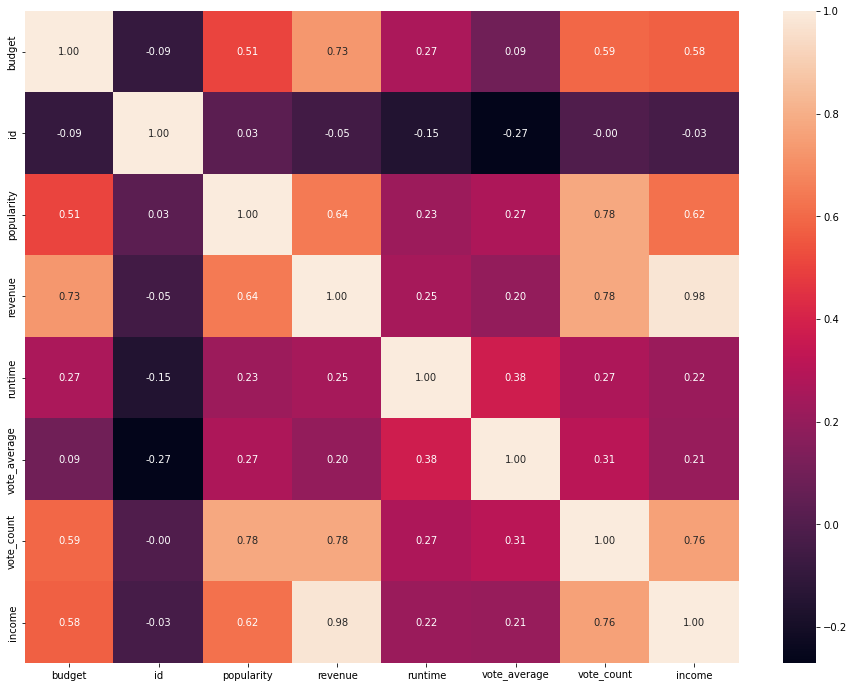

In [5]:
import seaborn as sns
f, ax = plt.subplots(figsize = (16,12))
sns.heatmap(movies.corr(),ax = ax, annot = True, fmt = ".2f")

In [6]:
movies['genres']

0       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
1       [{"id": 12, "name": "Adventure"}, {"id": 14, "...
2       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
3       [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4       [{"id": 28, "name": "Action"}, {"id": 12, "nam...
                              ...                        
4798    [{"id": 28, "name": "Action"}, {"id": 80, "nam...
4799    [{"id": 35, "name": "Comedy"}, {"id": 10749, "...
4800    [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...
4801                                                   []
4802                  [{"id": 99, "name": "Documentary"}]
Name: genres, Length: 4803, dtype: object

## 1.2 Data Preprocessing

In [7]:
# Data Preprocessing
import json
# changing the genres column from json to list
movies['genres'] = movies['genres'].apply(json.loads)
genres_list = []
for genres_dic_list in movies['genres']:
    genres_list.append([dic['name'] for dic in genres_dic_list])
movies['genres'] = genres_list

# changing the keywords column from json to list
movies['keywords'] = movies['keywords'].apply(json.loads)
keywords_list = []
for keywords_dic_list in movies['keywords']:
    keywords_list.append([dic['name'] for dic in keywords_dic_list])
movies['keywords'] = keywords_list

# changing the production_companies column from json to list
movies['production_companies'] = movies['production_companies'].apply(json.loads)
pc_list = []
for pc_dic_list in movies['production_companies']:
    pc_list.append([dic['name'] for dic in pc_dic_list])
movies['production_companies'] = pc_list

# changing the cast column from json to list
credits['cast'] = credits['cast'].apply(json.loads)
cast_list = []
for cast_dic_list in credits['cast']:
    cast_list.append([dic['name'] for dic in cast_dic_list])
credits['cast'] = cast_list

# changing the crew column from json to list    
credits['crew'] = credits['crew'].apply(json.loads)
def director(x):
    for i in x:
        if i['job'] == 'Director':
            return i['name']
credits['crew'] = credits['crew'].apply(director)
credits.rename(columns={'crew':'director'},inplace=True)

In [8]:
movies['keywords']

0       [culture clash, future, space war, space colon...
1       [ocean, drug abuse, exotic island, east india ...
2       [spy, based on novel, secret agent, sequel, mi...
3       [dc comics, crime fighter, terrorist, secret i...
4       [based on novel, mars, medallion, space travel...
                              ...                        
4798    [united states–mexico barrier, legs, arms, pap...
4799                                                   []
4800    [date, love at first sight, narration, investi...
4801                                                   []
4802            [obsession, camcorder, crush, dream girl]
Name: keywords, Length: 4803, dtype: object

In [9]:
credits.director

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

### Preprocessing Movie Description

In [10]:
movies['tagline'].fillna('', inplace=True)
movies['description'] = movies['tagline'] + ' ' + movies['overview']
movies['description']

0       Enter the World of Pandora. In the 22nd centur...
1       At the end of the world, the adventure begins....
2       A Plan No One Escapes A cryptic message from B...
3       The Legend Ends Following the death of Distric...
4       Lost in our world, found in another. John Cart...
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800     "Signed, Sealed, Delivered" introduces a dedi...
4801    A New Yorker in Shanghai When ambitious New Yo...
4802     Ever since the second grade when he first saw...
Name: description, Length: 4803, dtype: object

In [11]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
stop_words = stopwords.words('english') + ['one', 'two', 'three', 'four', 'five', 'get']
wl = WordNetLemmatizer()

def clean_text(text):
    '''
    Input:
        text: a string to clean.
    Output:
        text_cleaned: a processed message. 
    '''
    # Remove all punctuations
    text = re.sub(r'[^\w\s]', '', text)
    
    # Lowercase all words
    text = text.lower()
    
    # Remove stopwords and stem words
    tokens_cleaned = []
    text_tokens = word_tokenize(text)
    for token in text_tokens:
        if ((token.isalpha()) and (token not in stop_words)):
            # use WordNetLemmatizer to lemmatize word 
            lemmatized_word = wl.lemmatize(token)
            tokens_cleaned.append(lemmatized_word)
    
    text_cleaned = ' '.join(tokens_cleaned)
    return text_cleaned

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [12]:
# clean text
movies['description'] = [clean_text(str(dpt)) for dpt in movies['description']]
movies['description']

0       enter world pandora century paraplegic marine ...
1       end world adventure begin captain barbossa lon...
2       plan escape cryptic message bond past sends tr...
3       legend end following death district attorney h...
4       lost world found another john carter warweary ...
                              ...                        
4798    didnt come looking trouble trouble came lookin...
4799    newlywed couple honeymoon upended arrival resp...
4800    signed sealed delivered introduces dedicated q...
4801    new yorker shanghai ambitious new york attorne...
4802    ever since second grade first saw et extraterr...
Name: description, Length: 4803, dtype: object

## 1.3 Features Selection

In [13]:
movies = movies.merge(credits,left_on='id',right_on='movie_id',how='left',suffixes=(None, '_y'))
movies = movies[['id','title','popularity','genres','cast','vote_average','director','keywords','description']]

In [14]:
movies

,id,title,popularity,genres,cast,vote_average,director,keywords,description
0,19995,Avatar,150.437577,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.2,James Cameron,"[culture clash, future, space war, space colon...",enter world pandora century paraplegic marine ...
1,285,Pirates of the Caribbean: At World's End,139.082615,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.9,Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...",end world adventure begin captain barbossa lon...
2,206647,Spectre,107.376788,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.3,Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...",plan escape cryptic message bond past sends tr...
3,49026,The Dark Knight Rises,112.312950,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",7.6,Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...",legend end following death district attorney h...
4,49529,John Carter,43.926995,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",6.1,Andrew Stanton,"[based on novel, mars, medallion, space travel...",lost world found another john carter warweary ...
...,...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,14.269792,"[Action, Crime, Thriller]","[Carlos Gallardo, Jaime de Hoyos, Peter Marqua...",6.6,Robert Rodriguez,"[united states–mexico barrier, legs, arms, pap...",didnt come looking trouble trouble came lookin...
4799,72766,Newlyweds,0.642552,"[Comedy, Romance]","[Edward Burns, Kerry Bishé, Marsha Dietlein, C...",5.9,Edward Burns,[],newlywed couple honeymoon upended arrival resp...
4800,231617,"Signed, Sealed, Delivered",1.444476,"[Comedy, Drama, Romance, TV Movie]","[Eric Mabius, Kristin Booth, Crystal Lowe, Geo...",7.0,Scott Smith,"[date, love at first sight, narration, investi...",signed sealed delivered introduces dedicated q...
4801,126186,Shanghai Calling,0.857008,[],"[Daniel Henney, Eliza Coupe, Bill Paxton, Alan...",5.7,Daniel Hsia,[],new yorker shanghai ambitious new york attorne...


## 1.4 Show top genres

In [15]:
movies['genres']

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

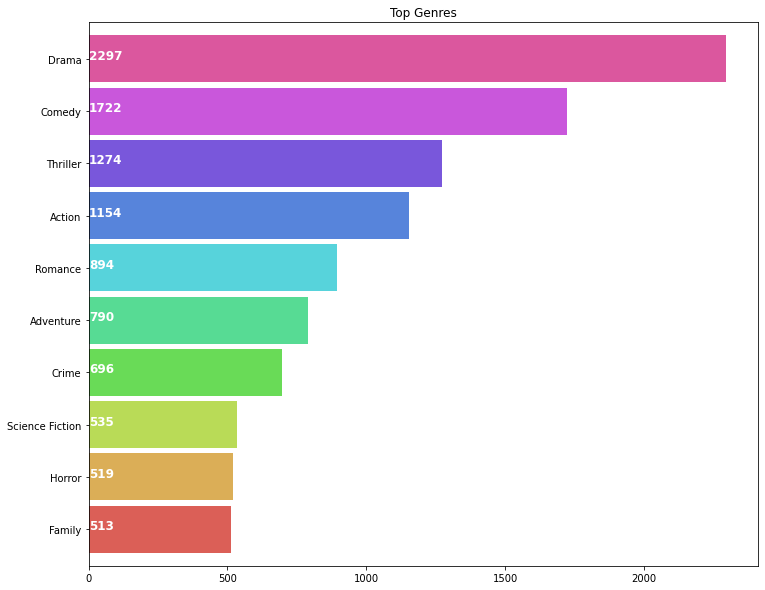

In [16]:
import seaborn as sns
plt.subplots(figsize=(12,10))
list1 = []
for i in movies['genres']:
    list1.extend(i)
ax = pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('hls',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True)): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Genres')
plt.show()

## 1.5 Show top actors

In [17]:
credits.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4800    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4801    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4803, dtype: object

In [18]:
movies.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4800    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4801    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4803, dtype: object

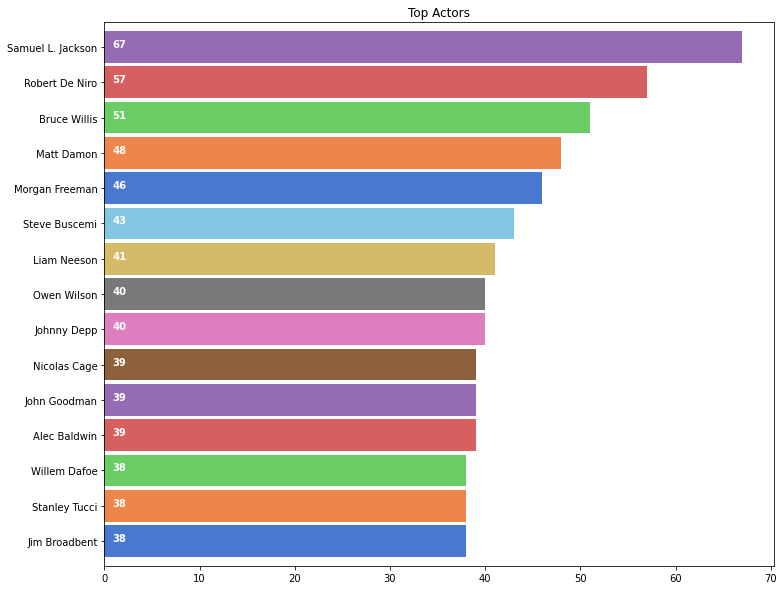

In [19]:
plt.subplots(figsize=(12,10))
list1=[]
for i in movies['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:15].sort_values(ascending=True).plot.barh(width=0.9,
color=sns.color_palette('muted',40))
for i, v in enumerate(pd.Series(list1).value_counts()[:15].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=10,color='white',weight='bold')
plt.title('Top Actors')
plt.show()

## 1.6 Show top directors

In [20]:
movies.director

0           James Cameron
1          Gore Verbinski
2              Sam Mendes
3       Christopher Nolan
4          Andrew Stanton
              ...        
4798     Robert Rodriguez
4799         Edward Burns
4800          Scott Smith
4801          Daniel Hsia
4802     Brian Herzlinger
Name: director, Length: 4803, dtype: object

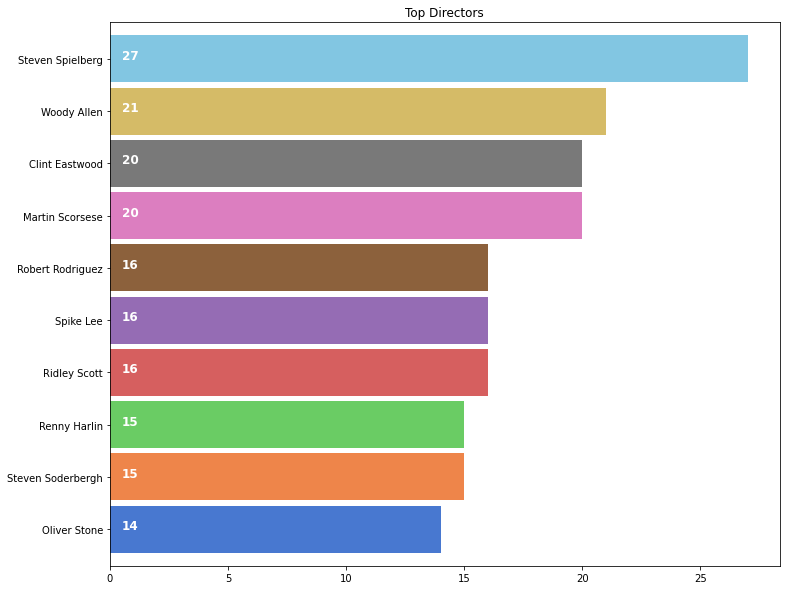

In [21]:
#find the top directors
plt.subplots(figsize=(12,10))
ax = movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('muted',40))
for i, v in enumerate(movies[movies['director']!=''].director.value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.5, i, v,fontsize=12,color='white',weight='bold')
plt.title('Top Directors')
plt.show()

## 1.7 Show wordcloud image of the keywords

In [22]:
pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [23]:
from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords
from nltk import word_tokenize
import nltk

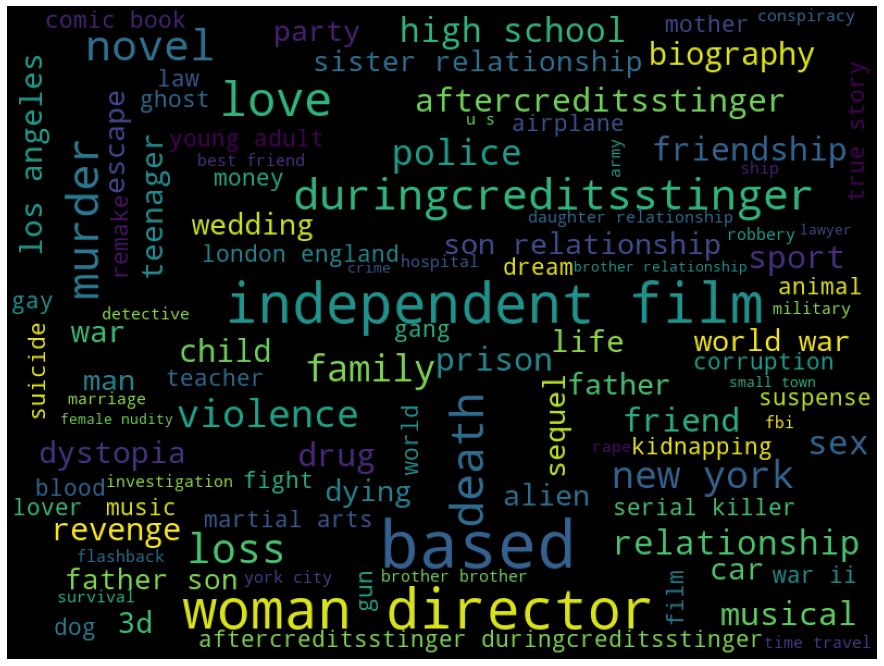

In [24]:
plt.subplots(figsize=(16,12))
words=[]
for kw_list in movies['keywords']:
    words.extend(kw_list)
wc = WordCloud(background_color="black", max_words=100, stopwords=STOPWORDS, max_font_size=60, width=800, height=600)
wc.generate(" ".join(words))
plt.imshow(wc)
plt.axis('off')
fig=plt.gcf()
plt.show()

## 1.8 Sort the movies by vote rating and popularity

In [25]:
movies.sort_values(by=["vote_average", 'popularity'],inplace=False,ascending=False).head(20)

,id,title,popularity,genres,cast,vote_average,director,keywords,description
4045,78373,"Dancer, Texas Pop. 81",0.376662,"[Comedy, Drama, Family]","[Breckin Meyer, Peter Facinelli, Eddie Mills, ...",10.0,Tim McCanlies,"[small town, texas]",middle nowhere everything guy best friend grow...
3519,89861,Stiff Upper Lips,0.356495,[Comedy],"[Georgina Cates, Peter Ustinov, Prunella Scale...",10.0,Gary Sinyor,"[italy, victorian england, young woman]",stiff upper lip broad parody british period fi...
4247,361505,Me You and Five Bucks,0.094105,"[Romance, Comedy, Drama]",[],10.0,None,[],story second second chance womanizing yet lova...
4662,40963,Little Big Top,0.092100,[Comedy],"[Sid Haig, Richard Riehle, Mel England, Jacob ...",10.0,None,[independent film],aging work clown return small hometown resigne...
3992,346081,Sardaarji,0.296981,[],[],9.5,Rohit Jugraj,[],ghost hunter us bottle capture troublesome spirit
2386,69848,One Man's Hero,0.910529,"[Western, Action, Drama, History]","[Tom Berenger, Joaquim de Almeida, Daniela Rom...",9.3,Lance Hool,"[war, army, battlefield, chivalry]",man hero another man traitor man hero tell lit...
1881,278,The Shawshank Redemption,136.747729,"[Drama, Crime]","[Tim Robbins, Morgan Freeman, Bob Gunton, Clan...",8.5,Frank Darabont,"[prison, corruption, police brutality, prison ...",fear hold prisoner hope set free framed double...
2970,88641,There Goes My Baby,0.037073,"[Drama, Comedy]","[Dermot Mulroney, Ricky Schroder, Kelli Willia...",8.5,Floyd Mutrux,[],group high school senior meet summer struggle ...
3337,238,The Godfather,143.659698,"[Drama, Crime]","[Marlon Brando, Al Pacino, James Caan, Richard...",8.4,Francis Ford Coppola,"[italy, love at first sight, loss of father, p...",offer cant refuse spanning year chronicle fict...
2796,43867,The Prisoner of Zenda,4.021389,"[Adventure, Drama, Romance]","[Ronald Colman, Madeleine Carroll, Raymond Mas...",8.4,John Cromwell,"[kidnapping, coronation, villain, kingdom, hei...",thrilling swordfight ever filmed englishman ru...


# 2 Vectorize the features
## 2.1 Vectorize the genres

In [26]:
genresList = []
for g_list in movies["genres"]:
    genresList.extend(g_list)
genresList = pd.unique(genresList)
genresList #now we have a list with unique genres

array(['Action', 'Adventure', 'Fantasy', 'Science Fiction', 'Crime',
       'Drama', 'Thriller', 'Animation', 'Family', 'Western', 'Comedy',
       'Romance', 'Horror', 'Mystery', 'History', 'War', 'Music',
       'Documentary', 'Foreign', 'TV Movie'], dtype=object)

In [27]:
movies.genres

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

In [28]:
def binary(genre_list):
    binaryList=[]
    for genres in genresList:
        if genres in genre_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [29]:
movies['genres_bin'] = movies['genres'].apply(lambda x: binary(x))
movies['genres_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: genres_bin, dtype: object

## 2.2 Vectorize the casts

In [30]:
# only take the top four actors
movies['cast'] = [cast_list[:4] for cast_list in movies['cast']]

In [31]:
movies.cast

0       [Sam Worthington, Zoe Saldana, Sigourney Weave...
1       [Johnny Depp, Orlando Bloom, Keira Knightley, ...
2       [Daniel Craig, Christoph Waltz, Léa Seydoux, R...
3       [Christian Bale, Michael Caine, Gary Oldman, A...
4       [Taylor Kitsch, Lynn Collins, Samantha Morton,...
                              ...                        
4798    [Carlos Gallardo, Jaime de Hoyos, Peter Marqua...
4799    [Edward Burns, Kerry Bishé, Marsha Dietlein, C...
4800    [Eric Mabius, Kristin Booth, Crystal Lowe, Geo...
4801    [Daniel Henney, Eliza Coupe, Bill Paxton, Alan...
4802    [Drew Barrymore, Brian Herzlinger, Corey Feldm...
Name: cast, Length: 4803, dtype: object

In [32]:
castList = []
for c_list in movies["cast"]:
    castList.extend(c_list)
castList = pd.unique(castList)

In [33]:
def binary(cast_list):
    binaryList = []
    
    for genre in castList:
        if genre in cast_list:
            binaryList.append(1)
        else:
            binaryList.append(0)
    
    return binaryList

In [34]:
movies['cast_bin'] = movies['cast'].apply(lambda x: binary(x))
movies['cast_bin'].head()

0    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
4    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: cast_bin, dtype: object

## 2.3 Vectorize the directors

In [35]:
directorList = pd.unique(list(movies['director']))
dict_idx = {directorList[i] : i for i in range(len(directorList))}

In [36]:
import numpy as np
def binary(director):
    vec = np.zeros(len(directorList), dtype=int)
    vec[dict_idx[director]] = 1
    return vec

In [37]:
movies['director_bin'] = movies['director'].apply(lambda x: binary(x))
movies['director_bin'].head()

0    [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
4    [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
Name: director_bin, dtype: object

## 2.4 Vectorize the keywords

In [38]:
words_list = []
for kw_list in movies["keywords"]:
    words_list.extend(kw_list)
words_list = pd.unique(words_list)

In [39]:
def binary(words):
    binaryList = []
    for w in words_list:
        if w in words:
            binaryList.append(1)
        else:
            binaryList.append(0)
    return binaryList

In [40]:
movies['words_bin'] = movies['keywords'].apply(lambda x: binary(x))

In [41]:
movies = movies[(movies['vote_average']!=0)] #removing the movies with 0 score and without drector names 
movies = movies[movies['director']!='']
movies.head()

,id,title,popularity,genres,cast,vote_average,director,keywords,description,genres_bin,cast_bin,director_bin,words_bin
0,19995,Avatar,150.437577,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.2,James Cameron,"[culture clash, future, space war, space colon...",enter world pandora century paraplegic marine ...,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,285,Pirates of the Caribbean: At World's End,139.082615,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.9,Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...",end world adventure begin captain barbossa lon...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,206647,Spectre,107.376788,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.3,Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...",plan escape cryptic message bond past sends tr...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,49026,The Dark Knight Rises,112.312950,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",7.6,Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...",legend end following death district attorney h...,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,49529,John Carter,43.926995,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",6.1,Andrew Stanton,"[based on novel, mars, medallion, space travel...",lost world found another john carter warweary ...,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


## 2.5 Vectorize the descriptions

In [42]:
word_list = []

for dpt in movies['description']:
    word_list.extend(dpt.split())

# Remove duplicate words
word_list = pd.unique(word_list)

# Only keep the words that occur in more than one descriptions
vocab = []
for word in word_list:
    word_cnt = 0
    for dpt in movies['description']:
        if word in dpt:
            word_cnt += 1
        if word_cnt > 1:
            vocab.append(word)
            break
    
print(len(vocab))

11754


In [43]:
# Create a dictionary to keep track of index of each word
dict_idx = {vocab[i] : i for i in range(len(vocab))}

In [44]:
import numpy as np
def bow(text):
    X_text = np.zeros(len(vocab),dtype=int)
    tokens = text.split()
    for word in vocab:
        if word in tokens:
            cnt = tokens.count(word)
            X_text[dict_idx[word]] = cnt
    return X_text

In [45]:
# bag-of-words vector for descriptions
movies['description_bow'] = movies['description'].apply(lambda x: bow(x))
movies['description_bow'].head()

0    [1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...
1    [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
2    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
3    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
4    [0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...
Name: description_bow, dtype: object

# 3 Cluster Movies

We will cluster movies using K-means based on BOW features.

In [46]:
# Concatenate the features of Genres, casts, directors, keywords and descriptions for each movie
feature_matrix = []
for index, m in movies.iterrows():
    feature_matrix.append([*m['genres_bin'], *m['cast_bin'], *m['director_bin'], *m['words_bin'], *m['description_bow']])

X = np.array(feature_matrix)
print(X)

[[1 1 1 ... 0 0 0]
 [1 1 1 ... 0 0 0]
 [1 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [47]:
# This cell will take 14 minutes  to run using Google Colab.
from sklearn.cluster import KMeans
RANDOM_STATE=37
MAX_CLUSTERS = 9

kms = []
inertia_values = []
for i in range(1, MAX_CLUSTERS+1):
  km = KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(X)
  kms.append(km)
  inertia_values.append(km.inertia_)


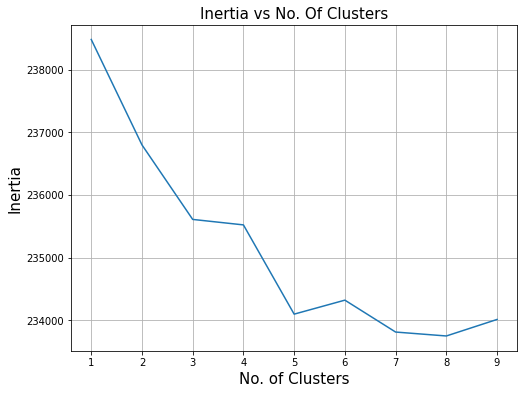

In [48]:
# plot the Inertia vs No. of Clusters graph
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(1, MAX_CLUSTERS+1), inertia_values)
plt.xlabel('No. of Clusters', fontsize=15)
plt.ylabel('Inertia', fontsize=15)
plt.title('Inertia vs No. Of Clusters', fontsize=15)
plt.grid()
plt.show()

In [49]:
from collections import Counter

for i in range(1, MAX_CLUSTERS+1):
  print(str(i) + ' clusters: ', Counter(kms[i-1].labels_))

1 clusters:  Counter({0: 4740})
2 clusters:  Counter({0: 2800, 1: 1940})
3 clusters:  Counter({0: 1785, 1: 1674, 2: 1281})
4 clusters:  Counter({0: 2163, 1: 1648, 3: 928, 2: 1})
5 clusters:  Counter({0: 1695, 1: 1221, 4: 719, 2: 688, 3: 417})
6 clusters:  Counter({5: 2150, 3: 1074, 2: 755, 1: 403, 4: 357, 0: 1})
7 clusters:  Counter({5: 1475, 6: 1129, 1: 914, 3: 680, 2: 530, 4: 11, 0: 1})
8 clusters:  Counter({3: 1262, 2: 1181, 4: 1141, 1: 620, 5: 533, 6: 1, 0: 1, 7: 1})
9 clusters:  Counter({4: 1967, 3: 1064, 6: 789, 2: 486, 5: 305, 8: 124, 1: 2, 0: 2, 7: 1})


We can see from the Inertia-K graph that, the elbow point is 5. We will use the labels of 5 clusters to group the movies.

In [50]:
N_CLUSTERS = 5

movies['cluster'] = kms[N_CLUSTERS-1].labels_
movie_clusters = (movies[['title', 'cluster', 'popularity']]
                  .sort_values(by=['cluster', 'popularity'], ascending=False)
                  .groupby('cluster').head(10))
movie_clusters = movie_clusters.copy(deep=True)

In [51]:
for cluster_num in range(N_CLUSTERS):
    pop_movies = movie_clusters[movie_clusters['cluster'] == cluster_num]['title'].values.tolist()
    print('CLUSTER ', cluster_num+1)
    print('Popular Movies:', pop_movies)
    print()

CLUSTER  1
Popular Movies: ['Whiplash', 'Fight Club', 'Fury', "One Flew Over the Cuckoo's Nest", 'The Godfather: Part II', 'The Green Mile', 'Cinderella', "We're the Millers", 'The Twilight Saga: Breaking Dawn - Part 2', 'The Wolf of Wall Street']

CLUSTER  2
Popular Movies: ['Mad Max: Fury Road', 'Dawn of the Planet of the Apes', 'The Hunger Games: Mockingjay - Part 1', 'Terminator Genisys', 'The Dark Knight', 'Inception', 'Gone Girl', 'Rise of the Planet of the Apes', 'The Maze Runner', 'Pulp Fiction']

CLUSTER  3
Popular Movies: ['Minions', 'Interstellar', 'Deadpool', 'Guardians of the Galaxy', 'Jurassic World', 'Pirates of the Caribbean: The Curse of the Black Pearl', 'Big Hero 6', 'Captain America: Civil War', 'The Martian', 'Batman v Superman: Dawn of Justice']

CLUSTER  4
Popular Movies: ['Frozen', 'Forrest Gump', 'Twilight', 'Bruce Almighty', 'The Twilight Saga: Eclipse', 'The Twilight Saga: New Moon', 'The Age of Adaline', 'The Fault in Our Stars', 'Amélie', 'Sex Tape']

CLUST

### Print the wordcloud image for the keywords of movies in each cluster

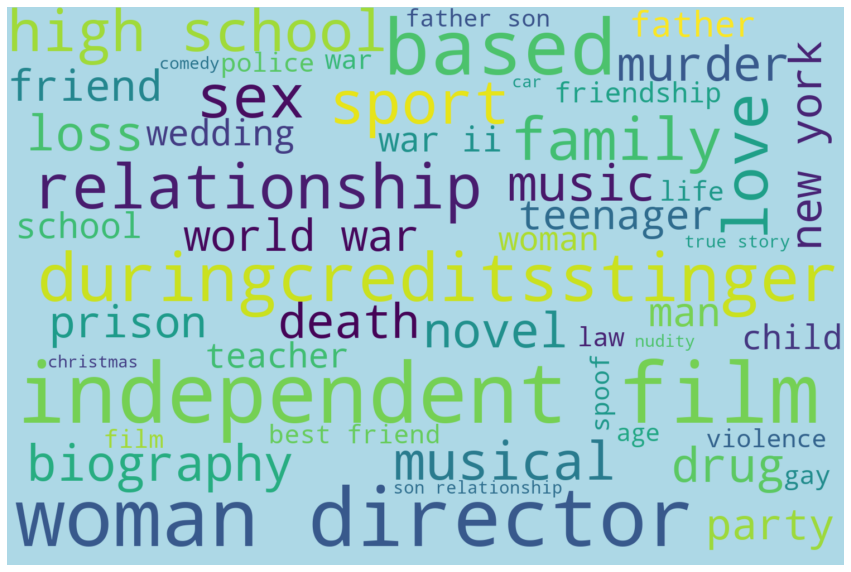

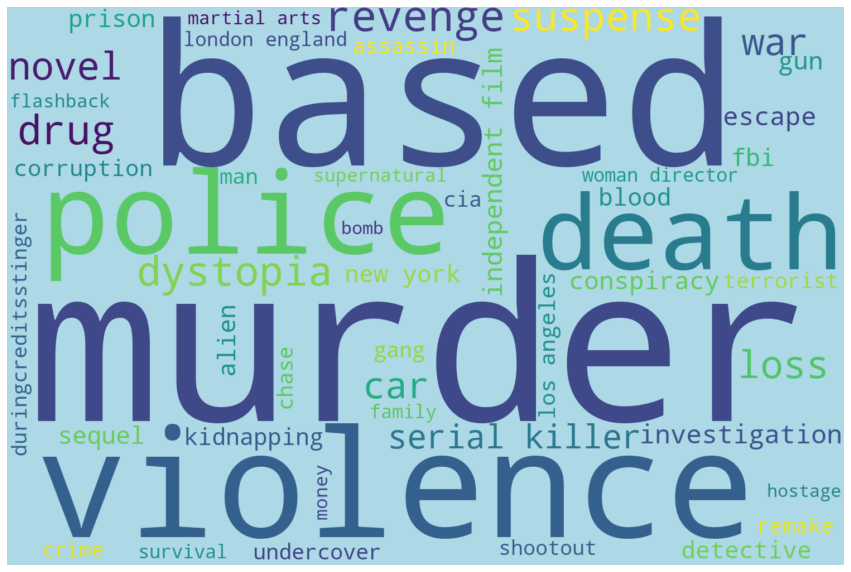

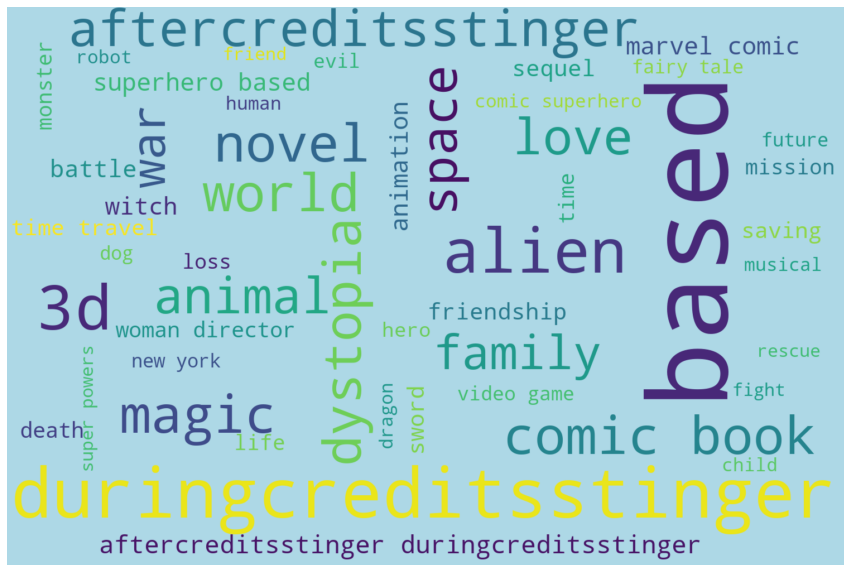

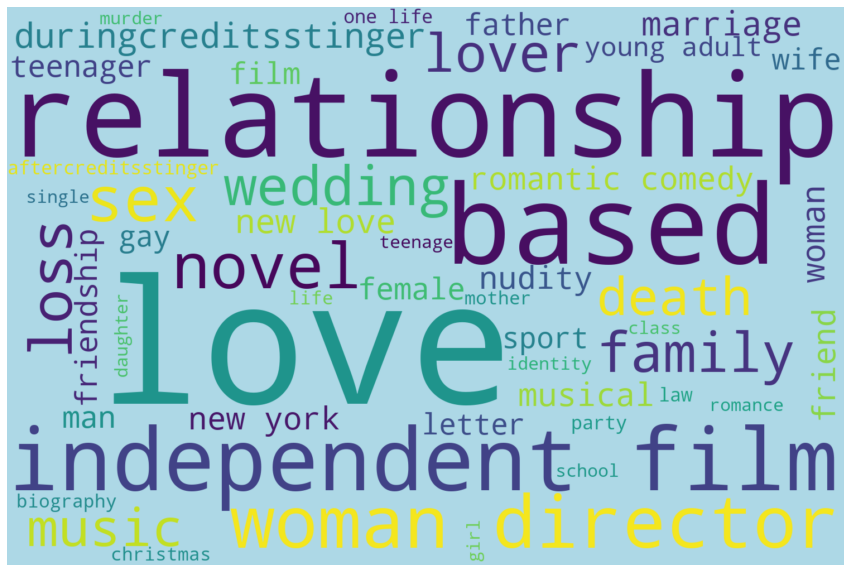

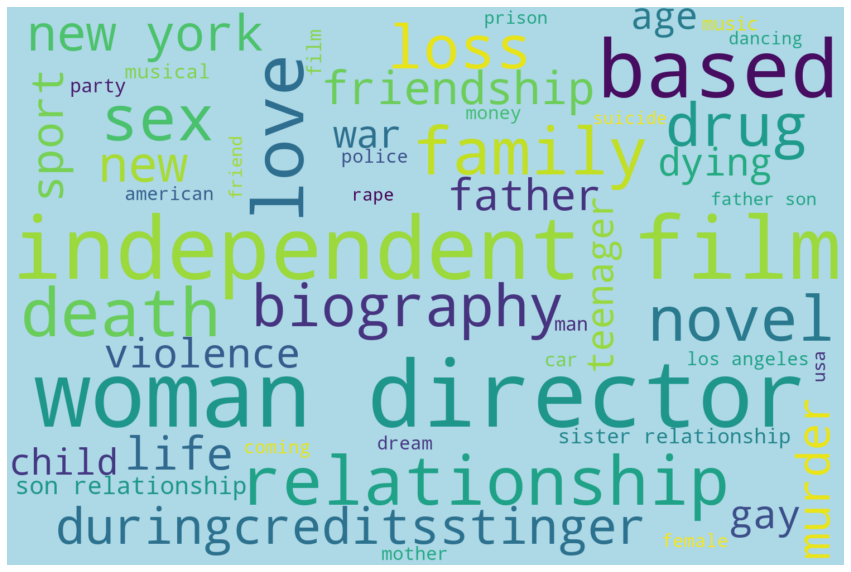

In [52]:
for cluster_num in range(N_CLUSTERS):
    kw_lists = movies[movies['cluster'] == cluster_num]['keywords']
    
    
    ### plot the clusters using word clouds
    words=[]
    for kw_list in kw_lists:
        words.extend(kw_list)
    wc = WordCloud(background_color="lightblue", max_words=50, stopwords=STOPWORDS, width=1500, height=1000)
    wc.generate(" ".join(words))
    
    # Display the generated image:
    plt.figure(figsize=(15,15))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.show()

# 4 Generate Recommendations
## 4.1 Computing the cosine distance

In [53]:
## cosine distance
from numpy import dot
from numpy.linalg import norm

def cos_sim(a, b):
    norm_a = norm(a)
    norm_b = norm(b)
    if norm_a == 0 or norm_b == 0:
      return 0
    return dot(a, b)/(norm_a*norm_b)

def cosine_dist(movieId1, movieId2):
    a = movies.iloc[movieId1]
    b = movies.iloc[movieId2]
    
    genresA = a['genres_bin']
    genresB = b['genres_bin']
    genreDistance = 1- cos_sim(genresA, genresB)
    
    castA = a['cast_bin']
    castB = b['cast_bin']
    castDistance = 1- cos_sim(castA, castB)
    
    directA = a['director_bin']
    directB = b['director_bin']
    directDistance = 1- cos_sim(directA, directB)

    wordsA = a['words_bin']
    wordsB = b['words_bin']
    wordsDistance = 1- cos_sim(wordsA, wordsB)
    
    # dptA = a['description_bow']
    # dptB = b['description_bow']
    # dptDistance = 1- cos_sim(dptA, dptB)
    
    # nomalize the distance with same weight to each feature vectors
    dist = (genreDistance + directDistance + castDistance + wordsDistance) / 4
    # dist = (genreDistance + directDistance + castDistance + wordsDistance + dptDistance) / 5
    
    return dist

### Distance of movie 3 and movie 65

In [54]:
print(movies.iloc[3])

id                                                             49026
title                                          The Dark Knight Rises
popularity                                                 112.31295
genres                              [Action, Crime, Drama, Thriller]
cast               [Christian Bale, Michael Caine, Gary Oldman, A...
vote_average                                                     7.6
director                                           Christopher Nolan
keywords           [dc comics, crime fighter, terrorist, secret i...
description        legend end following death district attorney h...
genres_bin         [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...
director_bin       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
description_bow    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...
cluster                           

In [55]:
print(movies.iloc[65])

id                                                               155
title                                                The Dark Knight
popularity                                                187.322927
genres                              [Drama, Action, Crime, Thriller]
cast               [Christian Bale, Heath Ledger, Aaron Eckhart, ...
vote_average                                                     8.2
director                                           Christopher Nolan
keywords           [dc comics, crime fighter, secret identity, sc...
description        serious batman raise stake war crime help lt j...
genres_bin         [1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, ...
director_bin       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
description_bow    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
cluster                           

In [56]:
cosine_dist(3,65)

0.26235911077760427

### Distance of movie 7 and movie 25

In [57]:
print(movies.iloc[7])

id                                                             99861
title                                        Avengers: Age of Ultron
popularity                                                134.279229
genres                          [Action, Adventure, Science Fiction]
cast               [Robert Downey Jr., Chris Hemsworth, Mark Ruff...
vote_average                                                     7.3
director                                                 Joss Whedon
keywords           [marvel comic, sequel, superhero, based on com...
description        new age come tony stark try jumpstart dormant ...
genres_bin         [1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
cast_bin           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
director_bin       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
words_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
description_bow    [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, ...
cluster                           

In [58]:
print(movies.iloc[25])

id                                                               597
title                                                        Titanic
popularity                                                100.025899
genres                                    [Drama, Romance, Thriller]
cast               [Kate Winslet, Leonardo DiCaprio, Frances Fish...
vote_average                                                     7.5
director                                               James Cameron
keywords           [shipwreck, iceberg, ship, panic, titanic, oce...
description        nothing earth could come year later woman name...
genres_bin         [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...
cast_bin           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
director_bin       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
words_bin          [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
description_bow    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
cluster                           

In [59]:
cosine_dist(7,25)

0.9808820221774532

## 4.2 Generate Recommendations

In [60]:
new_id = list(range(0,movies.shape[0]))
movies['new_id']=new_id
movies.head()


,id,title,popularity,genres,cast,vote_average,director,keywords,description,genres_bin,cast_bin,director_bin,words_bin,description_bow,cluster,new_id
0,19995,Avatar,150.437577,"[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",7.2,James Cameron,"[culture clash, future, space war, space colon...",enter world pandora century paraplegic marine ...,"[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",2,0
1,285,Pirates of the Caribbean: At World's End,139.082615,"[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",6.9,Gore Verbinski,"[ocean, drug abuse, exotic island, east india ...",end world adventure begin captain barbossa lon...,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",2,1
2,206647,Spectre,107.376788,"[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",6.3,Sam Mendes,"[spy, based on novel, secret agent, sequel, mi...",plan escape cryptic message bond past sends tr...,"[1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1,2
3,49026,The Dark Knight Rises,112.312950,"[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",7.6,Christopher Nolan,"[dc comics, crime fighter, terrorist, secret i...",legend end following death district attorney h...,"[1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",1,3
4,49529,John Carter,43.926995,"[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",6.1,Andrew Stanton,"[based on novel, mars, medallion, space travel...",lost world found another john carter warweary ...,"[1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...",2,4


In [61]:
import operator

def getNeighbors(baseMovie, K):
        distances = []
    
        for index, movie in movies.iterrows():
            if (movie['new_id'] != baseMovie['new_id'] and movie['cluster'] == baseMovie['cluster']):
                dist = cosine_dist(baseMovie['new_id'], movie['new_id'])
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x])
        return neighbors

In [62]:
def get_recmds(name):
    new_movie = movies[movies['title']==name].iloc[0]
    print('Selected Movie: ',new_movie.title)
    # print(new_movie)

    K = 10
    neighbors = getNeighbors(new_movie, K)
    
    print('\nRecommended Movies: \n')
    for neighbor in neighbors:
        movie = movies.iloc[neighbor[0]]
        # print(movie)
        print(movie['title']
              + " | Genres: "
              + ", ".join(movie['genres'])
              +" | Rating: "
              + str(movie['vote_average']))  

In [63]:
# name = input('Enter a movie title: ')
name = 'Catch Me If You Can'

get_recmds(name)

Selected Movie:  Catch Me If You Can

Recommended Movies: 

Saving Private Ryan | Genres: Drama, History, War | Rating: 7.9
War Horse | Genres: Drama, War | Rating: 7.0
Lincoln | Genres: History, Drama | Rating: 6.7
Close Encounters of the Third Kind | Genres: Science Fiction, Drama | Rating: 7.2
Amistad | Genres: Drama, History, Mystery | Rating: 6.8
Wall Street | Genres: Crime, Drama | Rating: 7.0
The Funeral | Genres: Crime, Drama | Rating: 7.3
American Hustle | Genres: Drama, Crime | Rating: 6.8
The Wolf of Wall Street | Genres: Crime, Drama, Comedy | Rating: 7.9
Capote | Genres: Crime, Drama | Rating: 6.8


## 4.3 Predict score

In [64]:
def predict_score(name):
    new_movie = movies[movies['title']==name].iloc[0]
    print('Selected Movie: ',new_movie.title)
    # print(new_movie)
    
    K = 10
    avgRating = 0
    neighbors = getNeighbors(new_movie, K)
    
    for neighbor in neighbors:
        avgRating = avgRating + movies.iloc[neighbor[0]]['vote_average']  
    
    avgRating = avgRating/K
    print('\nThe predicted rating for %s is: %f' %(new_movie['title'], avgRating))
    print('The actual rating for %s is %f' %(new_movie['title'], new_movie['vote_average']))

In [65]:
#name = input('Enter a movie title: ')
name = 'Catch Me If You Can'

predict_score(name)

Selected Movie:  Catch Me If You Can

The predicted rating for Catch Me If You Can is: 7.140000
The actual rating for Catch Me If You Can is 7.700000


## 5 Evaluation


In [66]:
import random
# MSE, MAE, R2, RMSE
import numpy as np
from sklearn.metrics import mean_squared_error #MSE
from sklearn.metrics import mean_absolute_error #MAE
from sklearn.metrics import r2_score#R 2

In [67]:

def cosine_dist1(genresA,castA,directA,wordsA, b):
    
    genresB = b['genres_bin']
    castB = b['cast_bin']
    directB = b['director_bin']
    wordsB = b['words_bin']
        
    genreDistance = 1- cos_sim(genresA, genresB)
    castDistance = 1- cos_sim(castA, castB)
    directDistance = 1- cos_sim(directA, directB)
    wordsDistance = 1- cos_sim(wordsA, wordsB)
    dist = (genreDistance + directDistance + castDistance + wordsDistance) / 4
    
    return dist

In [68]:
def getClosests(genresA,castA,directA,wordsA,moviewList, K):
        distances = []        
        
        for index, movie in movies.iterrows():
            if (movie['new_id'] not in moviewList):
                dist = cosine_dist1(genresA,castA,directA,wordsA, movie)
                distances.append((movie['new_id'], dist))
    
        distances.sort(key=operator.itemgetter(1))
        neighbors = []
    
        for x in range(K):
            neighbors.append(distances[x][0])
        return neighbors

In [69]:
def rmse(y_test, y_predict):
    result = mean_squared_error(y_test,y_predict)
    #mean_absolute_error(y_test,y_predict)
    np.sqrt(mean_squared_error(y_test,y_predict))  # RMSE就是对MSE开方即可
    return np.sqrt(mean_squared_error(y_test,y_predict))
def rmse_r2(y_test, y_predict):

    return r2_score(y_test, y_predict)

In [70]:
def evaluate(genresA,castA,directA,wordsA, id):
    result = 0
    b = movies.iloc[id]
    genresB = b['genres_bin']
    castB = b['cast_bin']
    directB = b['director_bin']
    wordsB = b['words_bin']
    result += rmse(b['genres_bin'], genresA/10)
    result += rmse(b['cast_bin'], castA/10)
    result += rmse(b['director_bin'], directA/10)
    result += rmse(b['words_bin'], wordsA/10)
    return result/4

def evaluate_r2(genresA,castA,directA,wordsA, id):
    result = 0
    b = movies.iloc[id]
    genresB = b['genres_bin']
    castB = b['cast_bin']
    directB = b['director_bin']
    wordsB = b['words_bin']
    result += rmse_r2(b['genres_bin'], genresA/10)
    result += rmse_r2(b['cast_bin'], castA/10)
    result += rmse_r2(b['director_bin'], directA/10)
    result += rmse_r2(b['words_bin'], wordsA/10)
    return result/4

## 5.1 Run 100 people result difference (RMSE AND R^2)

In [89]:
viewed=[]
recommands = []
difs = []
difs_r2 = []
for i in range(100):
    recommand = []
    dif = []
    dif_r2 = []
    random_array = random.sample(range(0, movies.shape[0]), 10)
    viewed.append(random_array)
    b = movies.iloc[1]
    genresA = np.zeros(np.shape(b['genres_bin']))
    castA = np.zeros(np.shape(b['cast_bin']))
    directA = np.zeros(np.shape(b['director_bin']))
    wordsA = np.zeros(np.shape(b['words_bin']))
    for id in random_array:
        movie = movies.iloc[id]
        genresA += movie['genres_bin']
        castA += movie['cast_bin']
        directA += movie['director_bin']
        wordsA += movie['words_bin']

    recommand = getClosests(genresA,castA,directA,wordsA, random_array, 10)
    recommands.append(recommand)
    for id in recommand:
        dif.append(evaluate(genresA,castA,directA,wordsA, id))
        dif_r2.append(evaluate_r2(genresA,castA,directA,wordsA, id))
    difs.append(dif)
    difs_r2.append(dif_r2)

In [90]:
avg_rmse = []
avg_r2 = []
for i in difs:
  avg_rmse.append(np.average(i))
for i in difs_r2:
  avg_r2.append(np.average(i))

## 5.2 Evaluation Result

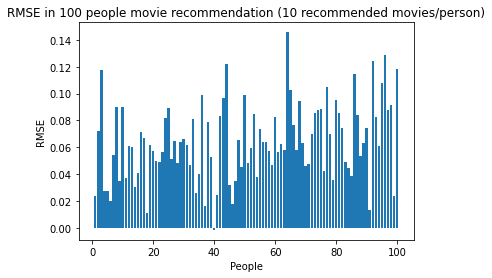

In [96]:
plt.bar(np.arange(1,101), avg_r2)
plt.title('RMSE in 100 people movie recommendation (10 recommended movies/person)')
plt.ylabel("RMSE")
plt.xlabel("People")
plt.show()


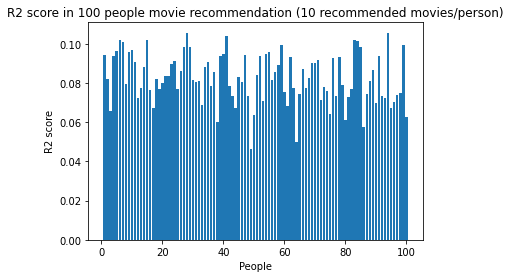

[0.09451319056697885, 0.08220371213989554, 0.06571478617604876, 0.09364440371764408, 0.09635310785853587, 0.10182049430289597, 0.10112313410357762, 0.07967018435335901, 0.09601261982170059, 0.09684227374756342, 0.09061935833926657, 0.0725891199695261, 0.07737703612035883, 0.08801195866096681, 0.1020707885143904, 0.07641037130476587, 0.06736575722317222, 0.08200086491257744, 0.07702573363977226, 0.080108739789619, 0.0837092363372958, 0.08352774127567719, 0.08994300352640741, 0.09130144504239995, 0.07714779683904774, 0.08615074500979047, 0.09822865952782311, 0.10562678158112326, 0.09836296464777029, 0.08175092144473514, 0.08029216898469453, 0.08102454589899051, 0.06901304355731373, 0.08799018766391226, 0.09052241691060371, 0.078565524249529, 0.08552711221638282, 0.06019943250564935, 0.0936024440730456, 0.09470141519196609, 0.10405753125479564, 0.07824137938831426, 0.0734655412841066, 0.06745181084978738, 0.0828310531146523, 0.08043096421021881, 0.0945143069611931, 0.07357960847665714, 0.

In [97]:
plt.bar(np.arange(1,101), avg_rmse)
plt.title('R2 score in 100 people movie recommendation (10 recommended movies/person)')
plt.ylabel("R2 score")
plt.xlabel("People")
plt.show()

print(avg_rmse)
print(avg_r2)